# Week 6 Assignment: Deep Learning tutorial, Prevent overfit

-------------

## 0 .data 업로드 / 확인 / 전처리

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다. 

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x, y), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


이전 mnist처럼 shape이 (data개수 = 60000개, 가로 pixel 수 = 28, 세로 pixel 수 = 28) 입니다.

In [ ]:
x.shape

(60000, 28, 28)

각 class와 숫자가 아래와 같이 연결되어 있습니다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

9 == Ankle boot


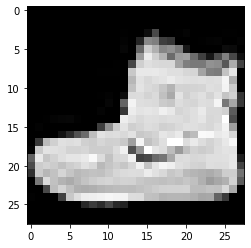

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 


index = 0 # index 설정에 따라 원하는 data를 골라서 그릴 수 있고 / 0~59999까지 대입 가능합니다.
print(str(y[index]) + ' == ' + str(class_names[y[index]]))
img = x[index]
plt.imshow(img, cmap='gray')

---------

## <font color="blue"> Question 1
    
**문제:** y와 y_test에 one-hot encoding을 하시오.

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
x = x.astype('float32') 
x_test = x_test.astype('float32')

x /= 255
x_test /= 255

### START CODE HERE ### (≈ 2 line of code)
y = to_categorical(y, 10) #10 classes
y_test = to_categorical(y_test, 10) #10 categories
### END CODE HERE ###

In [ ]:
import numpy as np

assert(np.sum(y) == 60000) # assert에서 error가 일어나지 않아야 정답입니다.

----------

## 미리 split하고 진행한다.

1) 매번 split 되는 data를 일정하게 하려고 random_state 값도 고정으로 설정했다.

2) data를 정교하게 split하려고 'stratify=y'를 사용해서 각 class가 같은 비율로 split 되게 했다.

In [ ]:
np.unique(y, axis=0) # y의 행 중 존재하는 값들만 중복없이 출력 -> 그래서 10개이다.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y.shape

(60000, 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size = 1/2, random_state = 3, stratify=y)

In [ ]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
np.sum(y_val, axis=0) # 'stratify=y' 덕분이다.

array([3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000., 3000.,
       3000.], dtype=float32)

-------

### <font color="red"> 정확한 비교를 위해서는 dropout, regularizer 이외에는 다른 요인을 바꾸지 않는 것이 좋다.
    
#### <font color="red"> (모델의 층과 unit 개수, activation 등 다른 hyperparameter는 바꾸려면 3개 모델을 같이 바꿔야한다.)

# 1. 기본 모델

## <font color="blue"> Question 2
    
**문제:** 해당 조건에 맞는 모델을 만드시오
    
**조건:** 
    
1) 1번째 layer는 dense가 아닌 flatten하는 과정을 가진다. (parameter를 가지는 layer는 아니다.)
    
2) 2번째 layer는 unit이 32, activation은 'relu'이다.

3) 3번째 layer는 unit이 64, activation은 'relu'이다.
    
4) 4번째 layer는 unit이 128, activation은 'relu'이다.
    
5) 5번째 layer는 multiclass classification의 output layer의 규칙에 맞게 만든다.
(단, optimizer는 adam으로 설정하고 metric(s)은 'accuracy'만 사용한다.)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten

In [19]:
def basic_model():
    model = Sequential()
    ### START CODE HERE ### (≈ 6 line of code)
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))# 마지막 layer는 multiclass이니 activation을 softmax
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #one-hot encoding을 한 경우
    ### END CODE HERE ###
    return model


In [20]:
model_basic = basic_model()

# 이 부분에서 error가 날 경우 다시 Question 2를 푸시오.
assert(len(model_basic.layers)==5)
assert(len(model_basic.weights)==8)
assert(len(model_basic.weights[4].numpy())==64)

In [21]:
model_basic.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


-------------

## <font color="blue"> Question 3
    
**문제:** 해당 조건에 맞게 train 하시오.
    
1) 3-way holdout을 맨 위에서 split한 data(x_train, y_train, x_val, y_val)을 이용해서 진행

2) epochs은 20으로 설정한다.

1> x: feature = input

2> y: label

3> epochs (7주차) (이전에 잠시 언급: 전체 training data를 train 하는 횟수)

4> verbose: train할 때 표시되는 bar (숫자를 추가할수록 기능이 추가되지만 보통 1을 사용

5> validation_split

여기서 data split을 할 수 있다.

x로 들어가는 data 중 validation set에 할당할 비율을 할당한다. (0~1사이의 float)

6> validation_data

미리 data를 잘라 두었다면 'validation_data = (x_val, y_val)' 식으로 할당해도 된다.

In [22]:
### START CODE HERE ### (≈ 1 line of code)
history_basic = model_basic.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)
### END CODE HERE ###

Epoch 1/20
938/938 [==============================] - 2s 3ms/step - loss: 0.5983 - accuracy: 0.7856 - val_loss: 0.4896 - val_accuracy: 0.8268
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4218 - accuracy: 0.8474 - val_loss: 0.4314 - val_accuracy: 0.8467
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3824 - accuracy: 0.8596 - val_loss: 0.3812 - val_accuracy: 0.8625
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3513 - accuracy: 0.8695 - val_loss: 0.3813 - val_accuracy: 0.8632
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3342 - accuracy: 0.8768 - val_loss: 0.3661 - val_accuracy: 0.8659
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3202 - accuracy: 0.8814 - val_loss: 0.3488 - val_accuracy: 0.8750
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3039 - accuracy: 0.8885 - val_loss: 0.3707 - val_accuracy: 0.8671
Epoch 

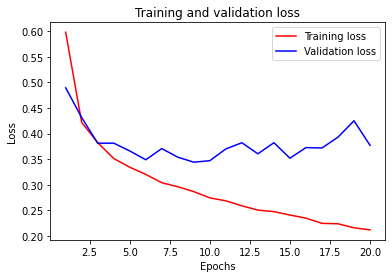

In [23]:
loss = history_basic.history['loss']
val_loss = history_basic.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

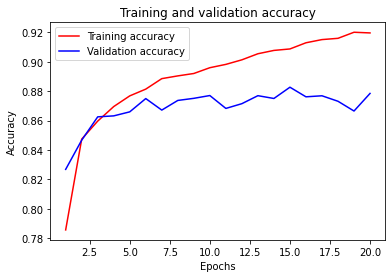

In [24]:
acc = history_basic.history['accuracy']
val_acc = history_basic.history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

-----------------

# 2. Regularizer

공식문서: https://keras.io/regularizers/

## <font color="blue"> Question 4
    
**문제:** 해당 조건에 맞는 모델을 만드시오.
    
1) 위의 model_basic(Question 2)과 똑같은 구조로 모델을 만든다.

2) L2 regularizer를 unit이 64인 부분과 128인 부분에 각각 λ(람다)를 0.001로 설정한다.

In [25]:
from tensorflow.keras import regularizers

In [28]:
def regularizer_model():
    model = Sequential()
    ### START CODE HERE ### (≈ 6 line of code)
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(10, activation='softmax'))# 마지막 layer는 multiclass이니 activation을 softmax
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #one-hot encoding을 한 경우
    ### END CODE HERE ###
    return model

In [29]:
model_rgrz = regularizer_model()

# 이 부분에서 error가 날 경우 다시 Question 4를 푸시오.
assert(len(model_rgrz.layers)==5)
assert(len(model_rgrz.weights)==8)
assert(len(model_rgrz.weights[4].numpy())==64)

In [30]:
model_rgrz.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


-----------

## <font color="blue"> Question 5
    
**문제:** 해당 조건에 맞게 train 하시오. (Question 3와 동일하게 train)
    
1) 3-way holdout을 맨 위에서 split한 data(x_train, y_train, x_val, y_val)을 이용해서 진행

2) epochs은 20으로 설정한다.

In [31]:
### START CODE HERE ### (≈ 1 line of code)
history_regularizer = model_rgrz.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)
### END CODE HERE ### 

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.7021 - accuracy: 0.7775 - val_loss: 0.5488 - val_accuracy: 0.8334
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5045 - accuracy: 0.8435 - val_loss: 0.4847 - val_accuracy: 0.8475
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4565 - accuracy: 0.8555 - val_loss: 0.4396 - val_accuracy: 0.8626
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4231 - accuracy: 0.8647 - val_loss: 0.4401 - val_accuracy: 0.8585
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4015 - accuracy: 0.8705 - val_loss: 0.4207 - val_accuracy: 0.8610
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3835 - accuracy: 0.8744 - val_loss: 0.4191 - val_accuracy: 0.8637
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3682 - accuracy: 0.8799 - val_loss: 0.4233 - val_accuracy: 0.8574
Epoch 

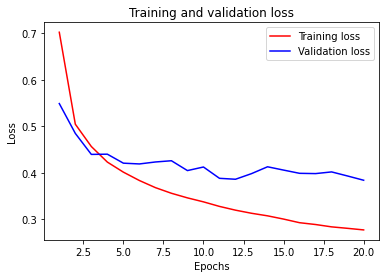

In [32]:
loss = history_regularizer .history['loss']
val_loss = history_regularizer .history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

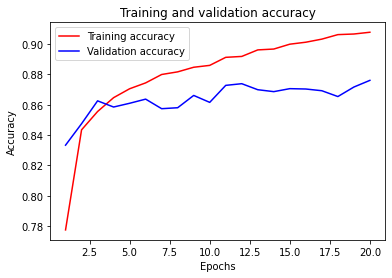

In [33]:
acc = history_regularizer .history['accuracy']
val_acc = history_regularizer .history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

-------------

# 3. Dropout

## <font color="blue"> Question 6
    
**문제:** 해당 조건에 맞는 모델을 만드시오.
    
1) 위의 model_basic(Question 2)과 똑같은 구조로 모델을 만든다.

2) Dropout을 unit이 64인 부분에 0.3을, 적용 128인 부분에 0.5를 적용한다.

In [34]:
from tensorflow.keras.layers import Dropout

In [35]:
def dropout_model():
    model = Sequential()
    ### START CODE HERE ### (≈ 8 line of code)
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))# 마지막 layer는 multiclass이니 activation을 softmax
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #one-hot encoding을 한 경우
    ### END CODE HERE ###
    return model

In [36]:
model_dpt = dropout_model()

# 이 부분에서 error가 날 경우 다시 Question 6를 푸시오.
assert(len(model_dpt.layers)==7)
assert(len(model_dpt.weights)==8)
assert(len(model_dpt.weights[4].numpy())==64)

In [37]:
model_dpt.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

----------

## <font color="blue"> Question 7
    
**문제:** 해당 조건에 맞게 train 하시오. (Question 3와 동일하게 train)
    
1) 3-way holdout을 맨 위에서 split한 data(x_train, y_train, x_val, y_val)을 이용해서 진행

2) epochs은 20으로 설정한다.

In [38]:
### START CODE HERE ### (≈ 1 line of code)
history_dropout = model_dpt.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)
### END CODE HERE ###

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.8099 - accuracy: 0.7131 - val_loss: 0.4921 - val_accuracy: 0.8290
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.5155 - accuracy: 0.8218 - val_loss: 0.4326 - val_accuracy: 0.8436
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4558 - accuracy: 0.8386 - val_loss: 0.4164 - val_accuracy: 0.8493
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4312 - accuracy: 0.8490 - val_loss: 0.4083 - val_accuracy: 0.8533
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.4078 - accuracy: 0.8568 - val_loss: 0.3827 - val_accuracy: 0.8622
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3947 - accuracy: 0.8607 - val_loss: 0.3777 - val_accuracy: 0.8626
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3773 - accuracy: 0.8667 - val_loss: 0.3720 - val_accuracy: 0.8661
Epoch 

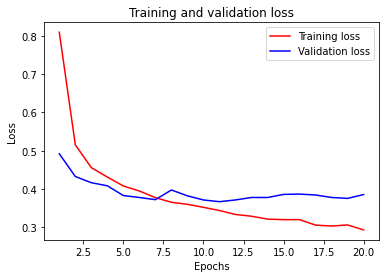

In [39]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()       

plt.show()

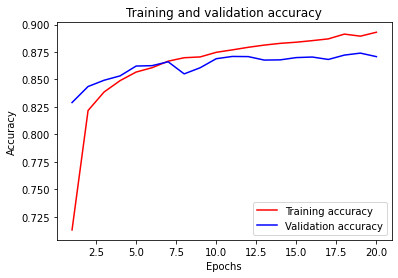

In [40]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [41]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

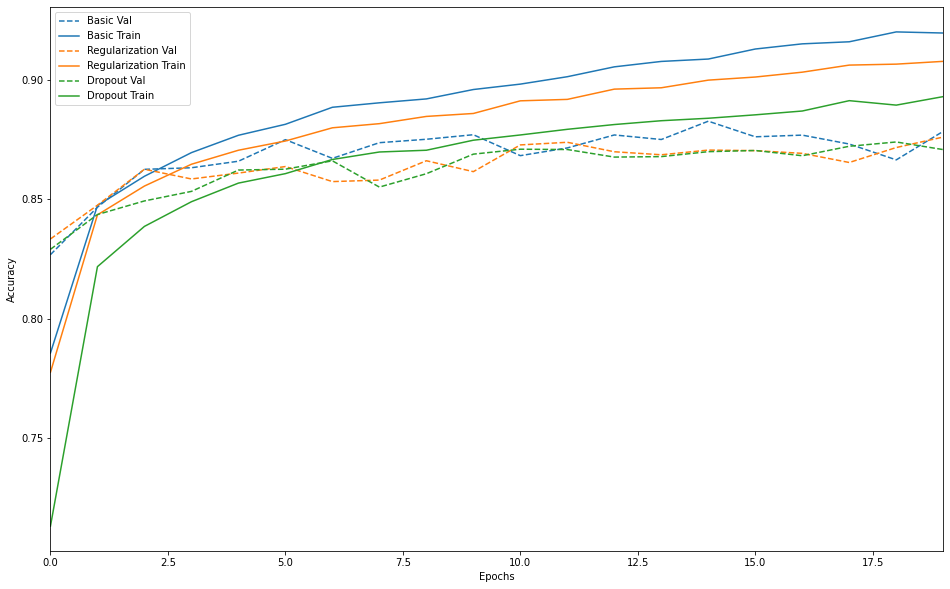

In [43]:
plot_history([('basic', history_basic),
              ('regularization', history_regularizer),
              ('dropout', history_dropout)])

#### <font color="orange"> overfitting이 없어지긴 했으나 생각만큼 performance가 좋지 않을 것입니다.
    
#### <font color="orange"> 그 이유는 무엇일까요? 
    

#### <font color="red"> 과제를 다 해결하셨다면 밑의 ...을 클릭해서 그 이유를 보시기 바랍니다.

    
#### <font color="orange"> 현재 상황은 overfit보다는 underfit에 가깝고 underfit을 해결하는 것이 우선이기 때문입니다. (C2 W1 L3)
    
#### <font color="orange"> 프로젝트 하실 때 overfit보다 underfit이 심한데 dropout과 같은 기법을 우선으로 쓰는 경우들이 많습니다.
    
#### <font color="orange"> 꼭 underfit일 때는 그에 맞는 전략을 먼저 사용해야 합니다.
    
#### <font color="orange"> underfit을 해결하는 전략은 7주차 수업 때 배우게 됩니다.